In [93]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
import matplotlib.pyplot as plt
import sklearn.model_selection as mods
import sklearn.linear_model as sklin
import sklearn.tree as st
#import xgboost as xgb


In [94]:
df=pd.read_csv('c:/temp/TestPredictionResults/TestPredictionResults_23-03-19_06-08-06.csv')

In [95]:
df.head()

,TestProgram_Name_NA,Family,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
0,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.691731
1,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.206417
2,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.616004
3,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.596088
4,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,367.486744


In [96]:
print(len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False]))
df = df.drop(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False].index)


13300


In [97]:
max_time = 7500
print(len(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time]))
df = df.drop(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time].index)

0


In [98]:
#sb.pairplot(df) 

In [99]:
#sb.displot(df['Shmoo_tests_count'])

In [100]:
#df.corr()

In [101]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_testTimeInMS_Target
count,86851.000000,86851.000000,86851.0,86851.000000,86851.000000,86851.000000,86851.000000
mean,15941.155323,12080.719635,0.0,1.445902,250.582699,64.554927,263.835868
std,6552.363323,4435.706572,0.0,1.498649,158.448452,47.961595,181.481198
min,245.000000,443.000000,0.0,0.000000,0.000000,-5.000000,0.576587
25%,15938.000000,13065.000000,0.0,0.000000,216.000000,0.000000,168.953203
50%,17422.000000,13378.000000,0.0,0.000000,239.000000,100.000000,230.620967
75%,20269.000000,14787.000000,0.0,3.000000,313.000000,100.000000,355.796257
max,57800.000000,19752.000000,0.0,3.000000,589.000000,100.000000,6894.905228


In [102]:
df.groupby('IsConcurrent').count()

,TestProgram_Name_NA,Family,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,,,,,,,,,,,,,,,,,
False,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975,44975
True,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876,41876


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86851 entries, 0 to 86850
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TestProgram_Name_NA                86851 non-null  object 
 1   Family                             86851 non-null  object 
 2   IsConcurrent                       86851 non-null  bool   
 3   Patterns_Count                     86851 non-null  int64  
 4   Tests_Count                        86851 non-null  int64  
 5   Mtt_Count                          86851 non-null  int64  
 6   ConcurrentFlows_Count              86851 non-null  int64  
 7   Shmoo_tests_count                  86851 non-null  int64  
 8   ITuff_Temperature_NA               86851 non-null  int64  
 9   ITuff_SubmitterFullName_NA         86851 non-null  object 
 10  ITuff_Lot_NA                       86851 non-null  object 
 11  ituff_EndDate_NA                   86851 non-null  obj

In [104]:
df.drop(['TestProgram_Name_NA','ITuff_Temperature_NA','ITuff_SubmitterFullName_NA','ITuff_Lot_NA', 'ituff_EndDate_NA','ITuff_PerUnit_IsPassed_Target_NA'], axis=1, inplace=True)
#df.drop(['ConcurrentFlows_Count'], axis=1, inplace=True)                # ConcurrentFlows_Count doesn't change result
#df.drop(['IsConcurrent'], axis=1, inplace=True)                         # 'IsConcurrent' doesn’t change result
df.drop(['Family'], axis=1, inplace=True)                               # 'Family' doesn’t change result
#df.drop(['Patterns_Count'], axis=1, inplace=True)                       # Patterns_Count helps a little
#df.drop(['Tests_Count'], axis=1, inplace=True)                         # Tests_Count helps a little
#df.drop(['Shmoo_tests_count'], axis=1, inplace=True)                   # Shmoo_tests_count helps a little
df.drop(['ITuff_BomGroup_FromSpark'], axis=1, inplace=True)
#df.drop(['ITuff_ProcessStep_FromSpark'], axis=1, inplace=True)         # ITuff_ProcessStep_FromSpark is critical
#df.drop(['ITuff_ExperimentType_FromSpark'], axis=1, inplace=True)      # ITuff_ExperimentType_FromSpark helps a little

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86851 entries, 0 to 86850
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsConcurrent                       86851 non-null  bool   
 1   Patterns_Count                     86851 non-null  int64  
 2   Tests_Count                        86851 non-null  int64  
 3   Mtt_Count                          86851 non-null  int64  
 4   ConcurrentFlows_Count              86851 non-null  int64  
 5   Shmoo_tests_count                  86851 non-null  int64  
 6   ITuff_PartType_FromSpark           86851 non-null  object 
 7   ITuff_ProcessStep_FromSpark        86851 non-null  object 
 8   ITuff_ExperimentType_FromSpark     86851 non-null  object 
 9   ITuff_PerUnit_testTimeInMS_Target  86851 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 6.0+ MB


In [106]:
#df = pd.get_dummies(df, columns =['Family'])
df = pd.get_dummies(df, columns =['ITuff_PartType_FromSpark'])
#df = pd.get_dummies(df, columns =['ITuff_BomGroup_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ProcessStep_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ExperimentType_FromSpark'])


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86851 entries, 0 to 86850
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   IsConcurrent                                86851 non-null  bool   
 1   Patterns_Count                              86851 non-null  int64  
 2   Tests_Count                                 86851 non-null  int64  
 3   Mtt_Count                                   86851 non-null  int64  
 4   ConcurrentFlows_Count                       86851 non-null  int64  
 5   Shmoo_tests_count                           86851 non-null  int64  
 6   ITuff_PerUnit_testTimeInMS_Target           86851 non-null  float64
 7   ITuff_PartType_FromSpark_H64ADNSVAL         86851 non-null  uint8  
 8   ITuff_PartType_FromSpark_H64ADNWVBL         86851 non-null  uint8  
 9   ITuff_PartType_FromSpark_H64AHSFVCC         86851 non-null  uint8  
 10  ITuff_Part

In [108]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_PerUnit_testTimeInMS_Target,ITuff_PartType_FromSpark_H64ADNSVAL,ITuff_PartType_FromSpark_H64ADNWVBL,ITuff_PartType_FromSpark_H64AHSFVCC,ITuff_PartType_FromSpark_H64ALNAVBJ,...,ITuff_ProcessStep_FromSpark_CLASSHOTR,ITuff_ProcessStep_FromSpark_CSM,ITuff_ProcessStep_FromSpark_FUSE,ITuff_ProcessStep_FromSpark_PHMCOLD,ITuff_ProcessStep_FromSpark_PHMCOLDR,ITuff_ProcessStep_FromSpark_PHMHOT,ITuff_ProcessStep_FromSpark_PHMHOTR,ITuff_ExperimentType_FromSpark_Correlation,ITuff_ExperimentType_FromSpark_Engineering,ITuff_ExperimentType_FromSpark_WalkTheLot
count,86851.000000,86851.000000,86851.0,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,...,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000,86851.000000
mean,15941.155323,12080.719635,0.0,1.445902,250.582699,263.835868,0.000276,0.000058,0.012965,0.055394,...,0.003581,0.030316,0.003823,0.111651,0.010685,0.139031,0.004030,0.550126,0.448458,0.001416
std,6552.363323,4435.706572,0.0,1.498649,158.448452,181.481198,0.016621,0.007587,0.113123,0.228748,...,0.059733,0.171457,0.061710,0.314938,0.102815,0.345981,0.063354,0.497484,0.497339,0.037606
min,245.000000,443.000000,0.0,0.000000,0.000000,0.576587,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15938.000000,13065.000000,0.0,0.000000,216.000000,168.953203,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17422.000000,13378.000000,0.0,0.000000,239.000000,230.620967,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20269.000000,14787.000000,0.0,3.000000,313.000000,355.796257,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57800.000000,19752.000000,0.0,3.000000,589.000000,6894.905228,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
#df.Family_RaptorLake.value_counts()

In [110]:
#sb.pairplot(df,hue='ITuff_PerUnit_testTimeInMS_Target',)

In [111]:
#plt.hist(df['ITuff_PerUnit_testTimeInMS_Target'])
#plt.show()

In [112]:
#sb.displot(df['ITuff_PerUnit_testTimeInMS_Target']) 

In [113]:
x = df.drop(['ITuff_PerUnit_testTimeInMS_Target'],axis=1)
y = df.ITuff_PerUnit_testTimeInMS_Target

In [114]:
x_train, x_test, y_train, y_test = mods.train_test_split(x, y, test_size=0.30,random_state=101)

In [115]:
model = sklin.LinearRegression()
#model = XGBRegressor(objective="reg:squarederror", random_state=42)


In [116]:
model.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred = model.predict(x_test)

In [118]:
import matplotlib.pyplot as plt

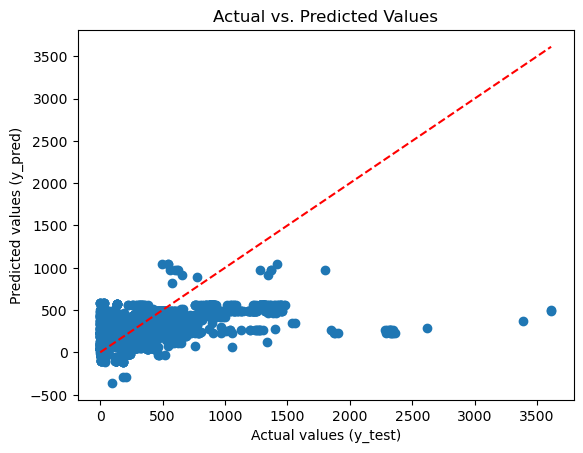

In [119]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [121]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MAE: ", mae)

MSE:  18646.683791705105
RMSE:  136.5528607964883
R-squared:  0.41767860247591093
MAE:  74.25685041912828
